## Importing relavent libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Reading the Data from the file

In [ ]:
df = pd.read_csv("/content/RestoInfo.csv", index_col='Unnamed: 0')
df.head(5)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
46019,Unique Brew Cafe Resto,No,No,NaN,0,Indiranagar,Quick Bites,NaN,Fast Food,200,[],[],Dine-out,Old Airport Road
28849,Jayanthi Sagar,No,No,3.1 /5,21,Koramangala 5th Block,Quick Bites,NaN,"South Indian, North Indian, Chinese",200,"[('Rated 2.0', ""RATEDn Works only because it'...",[],Dine-out,Koramangala 4th Block
19855,Rock Stone Ice Cream Factory,Yes,No,4.0/5,131,BTM,Dessert Parlor,"Icecream Cake, Brownie, Waffles, Chocolate Ice...",Ice Cream,230,"[('Rated 4.0', ""RATEDn Ice creams are really ...","['Midnight Indulgence Cake', 'Butterscotch Mel...",Delivery,Jayanagar
35188,Punjabi by Nature 2.0,No,No,4.2 /5,3236,BTM,"Casual Dining, Microbrewery","Paneer Tikki, Mutton Raan, Mango Margarita, Cr...",North Indian,NaN,"[('Rated 3.0', ""RATEDn It has a beautiful amb...",[],Delivery,Koramangala 7th Block
7070,Rayalaseema Chefs,Yes,Yes,3.9/5,225,Marathahalli,Casual Dining,"Bamboo Chicken, Butter Naan, Mutton Biryani, P...","North Indian, Biryani, Andhra, Chinese",800,"[('Rated 5.0', 'RATEDn Had Good experience wi...",[],Delivery,Brookefield


## Viewing the nature of data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 46019 to 28875
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         2069 non-null   object
 1   online_order                 2069 non-null   object
 2   book_table                   2069 non-null   object
 3   rate                         1770 non-null   object
 4   votes                        2069 non-null   int64 
 5   location                     2069 non-null   object
 6   rest_type                    2052 non-null   object
 7   dish_liked                   962 non-null    object
 8   cuisines                     2069 non-null   object
 9   approx_cost(for two people)  2053 non-null   object
 10  reviews_list                 2069 non-null   object
 11  menu_item                    2069 non-null   object
 12  listed_in(type)              2069 non-null   object
 13  listed_in(city)             

In [ ]:
df.nunique()

name                           1665
online_order                      2
book_table                        2
rate                             55
votes                           588
location                         82
rest_type                        64
dish_liked                      825
cuisines                        771
approx_cost(for two people)      46
reviews_list                   1698
menu_item                       483
listed_in(type)                   7
listed_in(city)                  30
dtype: int64

In [ ]:
df.describe()

,votes
count,2069.000000
mean,276.048333
std,673.916908
min,0.000000
25%,7.000000
50%,43.000000
75%,210.000000
max,7854.000000


## Cleaning the Data

In [ ]:
df.loc[:, 'rate'] = df['rate'].dropna().apply(lambda x: float(x.split('/')[0]) if '/5' in x else np.nan)

In [ ]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].dropna().apply(lambda x: int(x.replace(',','')))

In [ ]:
df.describe()

,rate,votes,approx_cost(for two people)
count,1680.000000,2069.000000,2053.000000
mean,3.688571,276.048333,563.638578
std,0.448079,673.916908,469.924364
min,1.800000,0.000000,50.000000
25%,3.400000,7.000000,300.000000
50%,3.700000,43.000000,400.000000
75%,4.000000,210.000000,700.000000
max,4.900000,7854.000000,4000.000000


## Univariate Analysis

Text(0.5, 0, 'Number of branches')

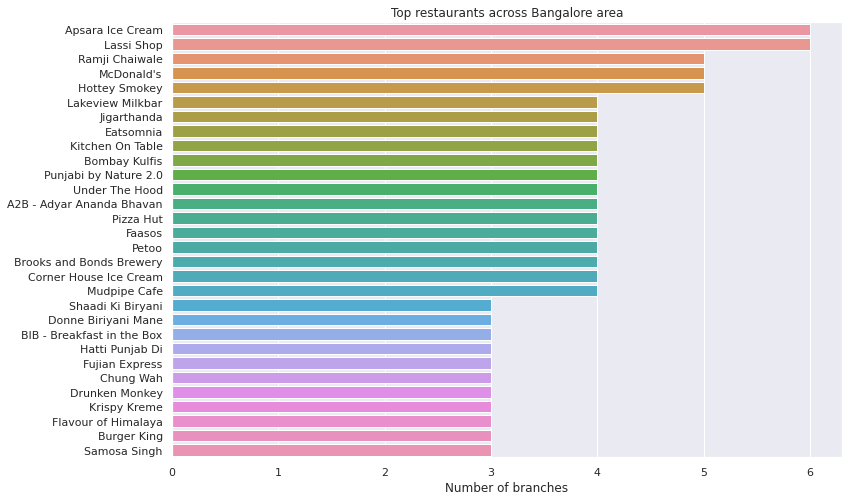

In [ ]:
plt.figure(figsize=(12,8))
most_branches = df['name'].value_counts()[:30]
sns.barplot(x=most_branches,y=most_branches.index)
plt.title("Top restaurants across Bangalore area")
plt.xlabel("Number of branches")

Apsara Ice Cream, Lasi Shop have more outlets in Bangalore than any other shops
It is followed by Ramji Chaiwale, MC Donals & Hottey Smookey have good Branches

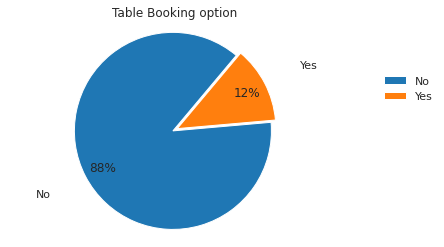

In [210]:
fig, ax = plt.subplots()
book_table = df['book_table'].value_counts(normalize=True).mul(100).round(1).to_frame()

ax.pie(book_table['book_table'].values, explode=(0.05,0), labels=book_table.index, autopct='%1.0f%%', 
       shadow=False, startangle=50, pctdistance=0.8,labeldistance=1.4, colors=plt.cm.tab10.colors)
ax.axis('equal')
ax.set_title("Table Booking option")
ax.legend(frameon=False, bbox_to_anchor=(1.3,0.8))

Almost 88% of the restaurants have Table Booking Feature

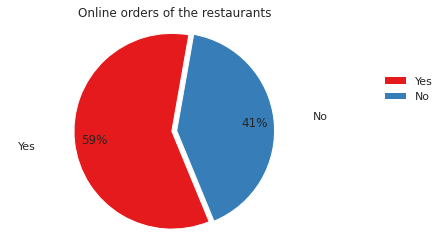

In [ ]:
fig, ax = plt.subplots()
online_orders = df['online_order'].value_counts(normalize=True).mul(100).round(1).to_frame()

ax.pie(online_orders['online_order'].values, explode=(0.05,0), labels=online_orders.index, autopct='%1.0f%%', 
       shadow=False, startangle=80, pctdistance=0.8,labeldistance=1.4, colors=plt.cm.Set1.colors)
ax.axis('equal')
ax.set_title("Online orders of the restaurants")
ax.legend(frameon=False, bbox_to_anchor=(1.3,0.8))

Close to 59% of the restaurats have online ordering facility

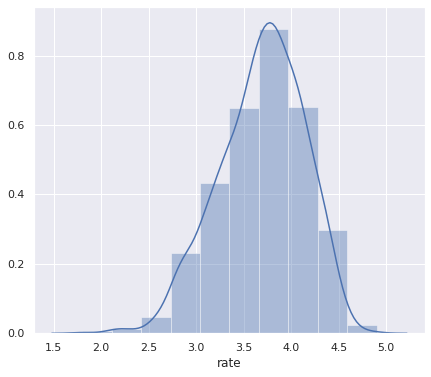

In [ ]:
plt.figure(figsize=(7,6))
sns.distplot(df['rate'],bins=10)

50% of the restaurants rating fall between 3.5 & 4.5.
Average rating is 3.6

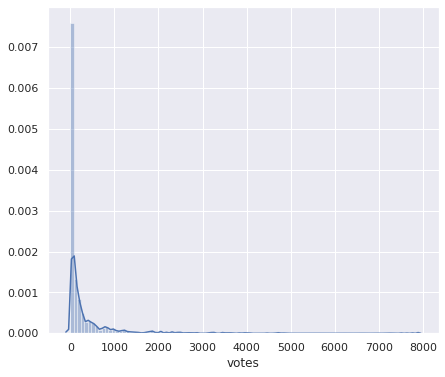

In [ ]:
plt.figure(figsize=(7,6))
sns.distplot(df['votes'],bins=100)

90% of the restaurants have less than 100 votes & very few restaurants have exceeded 1000 votes. Average rating is 276 votes.

Text(0.5, 0, 'Number of restaurants')

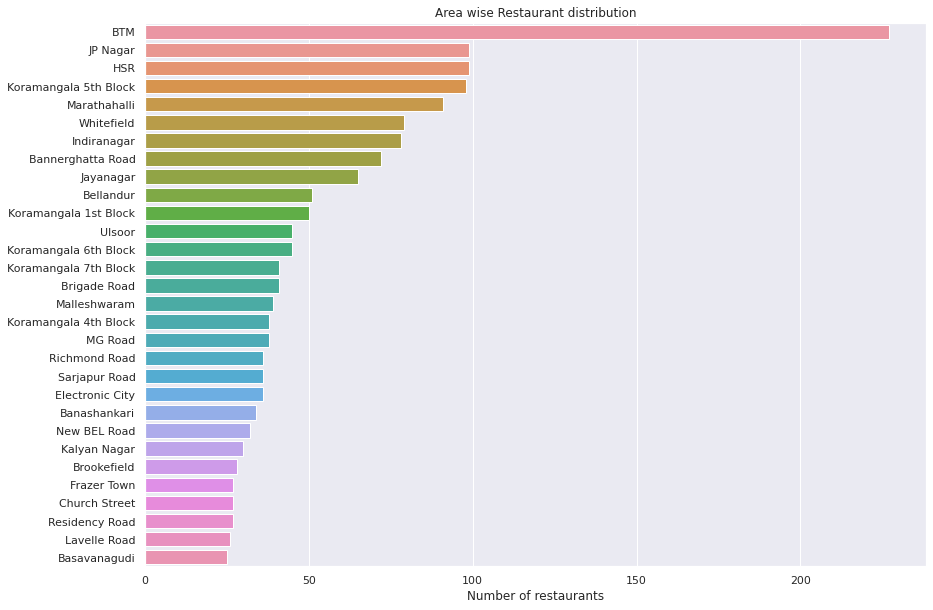

In [ ]:
plt.figure(figsize=(14,10))
area_wise_rst = df['location'].value_counts()[:30]
sns.barplot(x=area_wise_rst,y=area_wise_rst.index)
plt.title("Area wise Restaurant distribution")
plt.xlabel("Number of restaurants")

BTM Layput, JP Nagar, HSRLayout & Koramangla has densely populated restaurants in the city

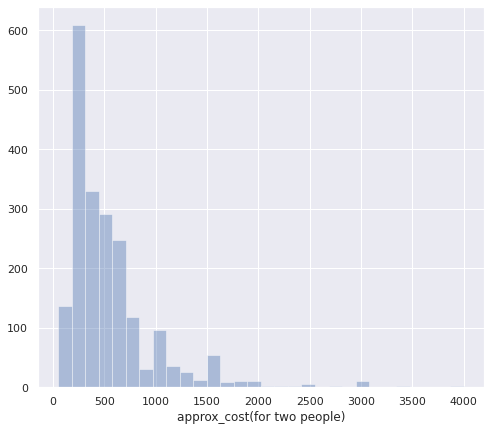

In [ ]:
plt.figure(figsize=(8,7))
sns.distplot(df['approx_cost(for two people)'],bins=30, kde=False)

Rs.560 is the average cost of two people. So the city has more top class restaurants.

Text(0.5, 0, 'Count of cuisines')

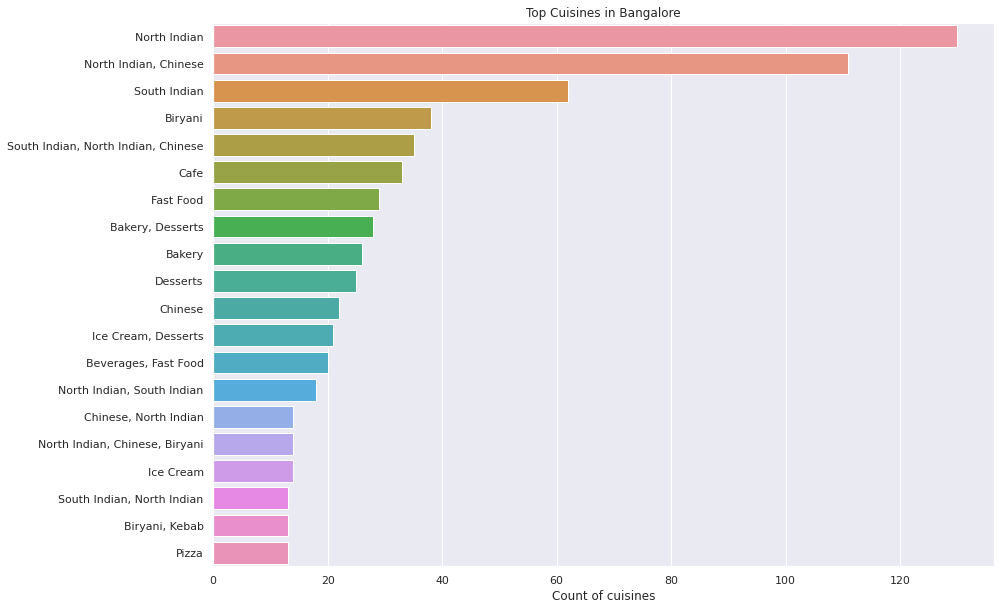

In [ ]:
plt.figure(figsize=(14,10))
cuisines = df['cuisines'].value_counts()[:20]
sns.barplot(x=cuisines,y=cuisines.index)
plt.title("Top Cuisines in Bangalore")
plt.xlabel("Count of cuisines")

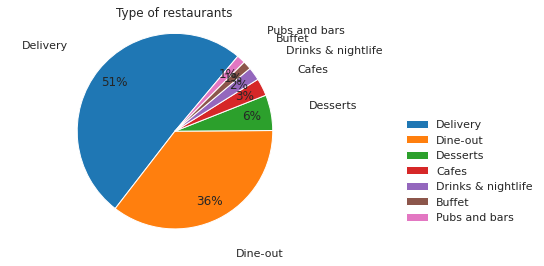

In [ ]:
fig, ax = plt.subplots()
book_table = df['listed_in(type)'].value_counts(normalize=True).mul(100).round(1).to_frame()

ax.pie(book_table['listed_in(type)'].values, labels=book_table.index, autopct='%1.0f%%', 
       shadow=False, startangle=50, pctdistance=0.8,labeldistance=1.4, colors=plt.cm.tab10.colors)
ax.axis('equal')
ax.set_title("Type of restaurants")
ax.legend(frameon=False, bbox_to_anchor=(1.6,0.6))

## Bivariate Analysis

[Text(0, 0.5, 'rate'),
 Text(0, 1.5, 'votes'),
 Text(0, 2.5, 'approx_cost(for two people)')]

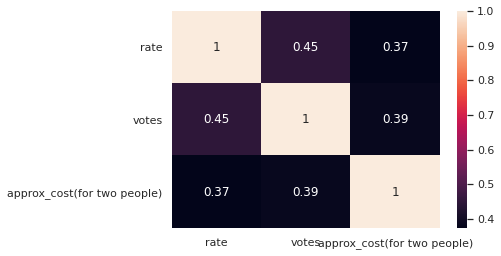

In [ ]:
corr = df.corr()
ax = sns.heatmap(corr, annot=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

In [ ]:
def show_wordcloud(res_type, cloud_series):
    plt.figure(figsize=(7,5))
    text = df[df['rest_type']==res_type][cloud_series].dropna().values
    wordcloud = WordCloud( width=3000, height=2000,  max_words=100, background_color = 'white', stopwords = STOPWORDS).generate(str(text))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(res_type)
    plt.show()

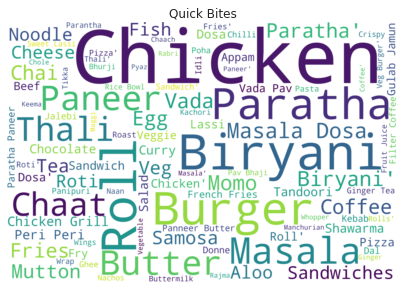

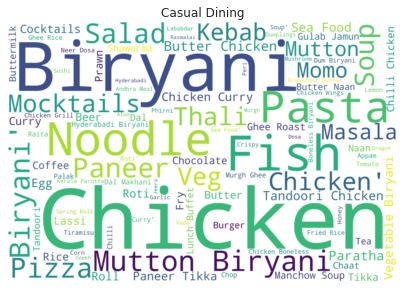

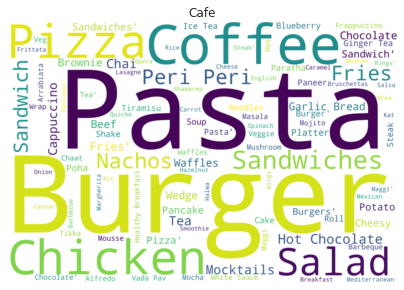

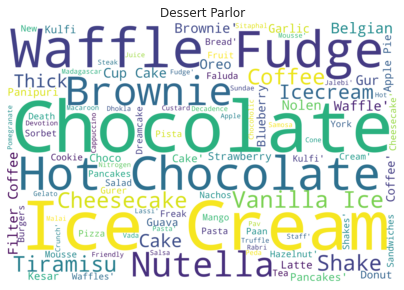

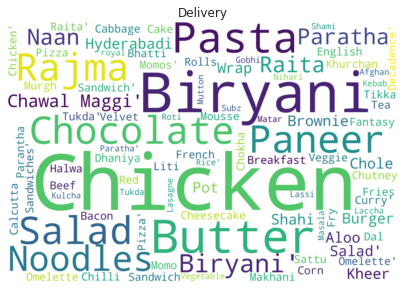

In [ ]:
rest_type = df['rest_type'].value_counts()[:5].index.tolist()

for li in rest_type:
    show_wordcloud(li, 'dish_liked')

Chicken is the most liked dish across many dines, while Pasta, Burger are preferred in Cafe. Chocolates, Ice Creams & Waffles are the most preferred desserts in Dessert Parlour.

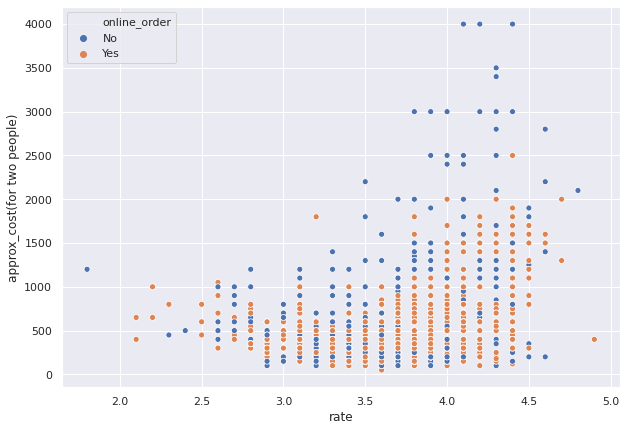

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="rate",y='approx_cost(for two people)',hue='online_order',data=df[['rate','approx_cost(for two people)','online_order']].dropna())
plt.show()

Mostly cheap restaurants are going with online ordering

In [247]:
cl = []
for c, l in zip(df['cuisines'],df['location']):
    cui = c.split(',')
    for j in cui:
        cl.append([l, j])

In [269]:
clh = pd.DataFrame(pd.DataFrame(cl,columns=['location','cuisines']).groupby(['cuisines','location']).size().reset_index())
piv = pd.pivot_table(clh, values=0,index="cuisines", columns="location", aggfunc='count', fill_value=0)
piv

location,BTM,Banashankari,Banaswadi,Bannerghatta Road,Basavanagudi,Basaveshwara Nagar,Bellandur,Bommanahalli,Brigade Road,Brookefield,CV Raman Nagar,Church Street,City Market,Commercial Street,Cunningham Road,Domlur,Ejipura,Electronic City,Frazer Town,HBR Layout,HSR,Hebbal,Hennur,Hosur Road,"ITPL Main Road, Whitefield",Indiranagar,Infantry Road,JP Nagar,Jakkur,Jayanagar,Jeevan Bhima Nagar,KR Puram,Kaggadasapura,Kalyan Nagar,Kammanahalli,Kanakapura Road,Kengeri,Koramangala,Koramangala 1st Block,Koramangala 2nd Block,...,Koramangala 5th Block,Koramangala 6th Block,Koramangala 7th Block,Koramangala 8th Block,Kumaraswamy Layout,Langford Town,Lavelle Road,MG Road,Magadi Road,Majestic,Malleshwaram,Marathahalli,Nagarbhavi,Nagawara,New BEL Road,North Bangalore,Old Airport Road,RT Nagar,Race Course Road,Rajajinagar,Rammurthy Nagar,Residency Road,Richmond Road,Sadashiv Nagar,Sahakara Nagar,Sanjay Nagar,Sarjapur Road,Seshadripuram,Shanti Nagar,Shivajinagar,South Bangalore,St. Marks Road,Thippasandra,Ulsoor,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,Whitefield,Wilson Garden,Yeshwantpur
cuisines,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
American,1,0,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
Andhra,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Arabian,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Asian,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tea,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Thai,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
Tibetan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


This table shows which cuisines are available in a specific location. Eg. In Bannargetta Road, there 

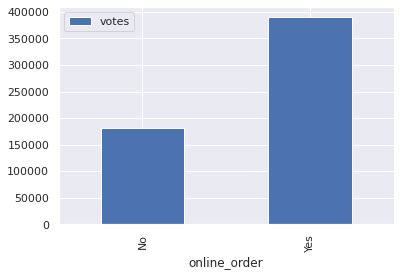

In [ ]:
df.groupby('online_order').agg({'votes':'sum'}).plot(kind='bar')

In [ ]:
new_cheap = df[['name','approx_cost(for two people)','location','rest_type','cuisines', 'rate', 'votes']].dropna()
new_cheap = new_cheap[(new_cheap['approx_cost(for two people)']  <= 500.00) & (new_cheap['rate']>=4) & (new_cheap['votes']>=500)]
new_cheap = new_cheap.sort_values(by=['approx_cost(for two people)'])
new_cheap

,name,approx_cost(for two people),location,rest_type,cuisines,rate,votes
3337,Vidyarthi Bhavan,150.0,Basavanagudi,Quick Bites,South Indian,4.4,4460
2766,Sri Guru Kottureshwara Davangere Benne Dosa,150.0,Basavanagudi,Quick Bites,South Indian,4.1,558
658,The Biryani Cafe,300.0,Banashankari,Quick Bites,"Biryani, Chinese, Kebab",4.1,520
17837,Bite Me Cupcakes,300.0,Indiranagar,Dessert Parlor,Desserts,4.2,624
30397,Cupcake Noggins,300.0,Koramangala 4th Block,"Dessert Parlor, Bakery","Desserts, Bakery",4.1,724
7762,Chai Galli,300.0,Brookefield,Cafe,"Cafe, Street Food",4.2,819
71,The Biryani Cafe,300.0,Banashankari,Quick Bites,"Biryani, Chinese, Kebab",4.1,520
29871,Khawa Karpo,350.0,Koramangala 5th Block,Quick Bites,"Chinese, Tibetan, Momos",4.3,995
45744,Motis Kitchen,350.0,Thippasandra,Quick Bites,"South Indian, Kerala, Biryani",4.1,563
51311,Mooch Marod,350.0,Whitefield,Quick Bites,North Indian,4.5,504


In [ ]:
new_expensive = df[['name','approx_cost(for two people)','location','rest_type','cuisines', 'rate', 'votes']].dropna()
new_expensive = new_expensive[(new_expensive['approx_cost(for two people)']  >= 2500.00) & (new_expensive['rate']>=4) & (new_expensive['votes']>=500)]
new_expensive = new_expensive.sort_values(by=['approx_cost(for two people)'])
new_expensive

,name,approx_cost(for two people),location,rest_type,cuisines,rate,votes
15757,1Q1,2500.0,Infantry Road,"Casual Dining, Bar","Asian, Japanese, Thai, Malaysian, Vietnamese, ...",4.3,597
32675,The Smoke Co.,2500.0,Koramangala 6th Block,Casual Dining,"American, European",4.4,523
42219,Cafe Mozaic - Taj MG Road Bengaluru,2500.0,MG Road,"Casual Dining, Cafe","North Indian, Italian, South Indian, Continent...",4.1,568
19116,Yauatcha,2800.0,MG Road,Fine Dining,"Chinese, Asian, Cantonese, Tea",4.6,2332
12561,KazÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ©,3000.0,Lavelle Road,Fine Dining,"Asian, Japanese, Thai",4.4,864
19127,Le Jardin - The Oberoi,3000.0,MG Road,Fine Dining,"European, Mediterranean, North Indian",4.3,687
39392,Ssaffron - Shangri-La Hotel,3000.0,Vasanth Nagar,"Fine Dining, Bar",North Indian,4.4,751
43327,The Market - The Ritz-Carlton,3400.0,Residency Road,Fine Dining,"North Indian, European, Thai",4.3,620
43298,Alba - JW Marriott Bengaluru,4000.0,Lavelle Road,Fine Dining,Italian,4.4,571


In [ ]:
all_ratings = []

for name,ratings in zip(df['name'],df['reviews_list']):
    try:
        ratings = eval(ratings)
        for score, doc in ratings:
            if score:
                score = score.strip("Rated").strip()
                doc = doc.strip('RATEDn ').strip()
                score = float(score)
                all_ratings.append([name,score, doc])
    except SyntaxError:
        pass

In [ ]:
rating_df=pd.DataFrame(all_ratings,columns=['name','rating','review'])
rating_df['review']=rating_df['review'].apply(lambda x : re.sub('[^a-zA-Z0-9\s]',"",x))

In [ ]:
rating_df.head(10)

,name,rating,review
0,Jayanthi Sagar,2.0,Works only because its cheap and near offices ...
1,Jayanthi Sagar,3.0,Nice and cheap place with good food If you are...
2,Jayanthi Sagar,3.5,his place is good stop if you are planning for...
3,Jayanthi Sagar,3.5,his is typically south Indian delicacy place s...
4,Jayanthi Sagar,3.0,Food 255nService 35nPrices 55nIdeal nofuss ...
5,Jayanthi Sagar,1.0,his place has lost its value because the food ...
6,Jayanthi Sagar,3.5,Youd almost not notice this Karnataka styled S...
7,Jayanthi Sagar,3.5,You might never notice this small south indian...
8,Jayanthi Sagar,3.5,Good place Cheaper prices A little dull ambien...
9,Jayanthi Sagar,1.0,Food is average here Had been to this place to...


In [ ]:
rating_df['sent']=rating_df['rating'].apply(lambda x: 1 if x>2.5 else 0)

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
stops=stopwords.words('english')
lem=WordNetLemmatizer()
corpus=' '.join(lem.lemmatize(x) for x in rating_df[rating_df['sent']==1]['review'][:3000] if x not in stops)
tokens=word_tokenize(corpus)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim

In [ ]:
vect=TfidfVectorizer()
vect_fit=vect.fit(tokens)

In [ ]:
vect_fit

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:
id_map=dict((v,k) for k,v in vect.vocabulary_.items())
vectorized_data=vect_fit.transform(tokens)
gensim_corpus=gensim.matutils.Sparse2Corpus(vectorized_data,documents_columns=False)
ldamodel = gensim.models.ldamodel.LdaModel(gensim_corpus,id2word=id_map,num_topics=5,random_state=34,passes=25)

In [ ]:
from collections import Counter

In [ ]:
counter=Counter(corpus)
out=[]
topics=ldamodel.show_topics(formatted=False)

In [ ]:
topics

[(0,
  [('place', 0.09185608),
   ('tea', 0.06493698),
   ('are', 0.03248985),
   ('their', 0.024586478),
   ('all', 0.023523545),
   ('my', 0.02240002),
   ('great', 0.021743072),
   ('can', 0.012674113),
   ('worth', 0.00954089),
   ('awesome', 0.009512928)]),
 (1,
  [('this', 0.060966007),
   ('with', 0.059098903),
   ('in', 0.050440654),
   ('but', 0.042780694),
   ('you', 0.035535686),
   ('as', 0.028073763),
   ('not', 0.02798928),
   ('its', 0.023528293),
   ('at', 0.022001598),
   ('which', 0.020121401)]),
 (2,
  [('the', 0.2014541),
   ('and', 0.17571558),
   ('is', 0.1153378),
   ('was', 0.0727314),
   ('it', 0.04092678),
   ('food', 0.03713868),
   ('they', 0.02619529),
   ('really', 0.022616543),
   ('were', 0.022588931),
   ('time', 0.019070363)]),
 (3,
  [('to', 0.10915259),
   ('good', 0.056550723),
   ('chai', 0.03295865),
   ('on', 0.030877957),
   ('here', 0.0218507),
   ('that', 0.01974844),
   ('so', 0.019340675),
   ('had', 0.019315567),
   ('one', 0.018529683),
  

In [ ]:
for i,topic in topics:
    for word,weight in topic:
        out.append([word,i,weight,counter[word]])

dataframe = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count']) 

In [ ]:
dataframe

,word,topic_id,importance,word_count
0,place,0,0.091856,0
1,tea,0,0.064937,0
2,are,0,0.032490,0
3,their,0,0.024586,0
4,all,0,0.023524,0
5,my,0,0.022400,0
6,great,0,0.021743,0
7,can,0,0.012674,0
8,worth,0,0.009541,0
9,awesome,0,0.009513,0
